In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
import scienceplots
from matplotlib.lines import Line2D

# Cargado de Datos

In [41]:
exps = ['exp1', 'exp2', 'exp3']
dfs = {}  # diccionario donde guardamos los DataFrames por experimento

for exp in exps:
    lista_dfs = []
    for generacion in range(90):
        ruta_archivo = f'resultados/{exp}/resultados_generacion_{generacion}.csv'
        if os.path.exists(ruta_archivo):
            datos = pd.read_csv(ruta_archivo)
            datos['generacion'] = generacion
            lista_dfs.append(datos)
        else:
            print(f'Archivo no encontrado: {ruta_archivo}')
            break
    
    # unir todos los de este experimento en un DataFrame
    dfs[exp] = pd.concat(lista_dfs, ignore_index=True)

# ahora accedés así:
df_exp1 = dfs['exp1']
df_exp2 = dfs['exp2']
df_exp3 = dfs['exp3']

def limpiar_valor(x):
    if pd.isna(x):
        return x  # deja los NaN como están
    x = str(x).strip()
    if x.startswith("[") and x.endswith("]"):
        x = x[1:-1]  # quita corchetes
    try:
        return float(x)
    except ValueError:
        return pd.NA  # si no se puede convertir

for col in ["beta", "gamma"]:
    df_exp2[col] = df_exp2[col].apply(limpiar_valor).astype(float)

Archivo no encontrado: resultados/exp1/resultados_generacion_87.csv
Archivo no encontrado: resultados/exp2/resultados_generacion_57.csv


In [43]:
df_exp2

,D,A,B,x,y,beta,gamma,fitness,generacion
0,98.381126,0.000232,6.054626,431.0,612.0,0.907130,0.583064,0.224057,0
1,95.663963,0.000242,15.559118,355.0,614.0,1.241181,0.606368,0.426973,0
2,88.380318,0.000076,17.091225,496.0,446.0,1.088033,0.763328,0.893293,0
3,39.732197,0.000376,1.646010,381.0,552.0,0.568085,0.170506,0.511850,0
4,46.814899,0.000368,16.856188,450.0,517.0,0.521543,0.255434,0.601990,0
...,...,...,...,...,...,...,...,...,...
569995,18.718412,0.000149,16.733330,388.0,625.0,1.235818,0.639632,0.171307,56
569996,25.155716,0.000107,22.649410,395.0,599.0,1.026568,0.184822,0.162650,56
569997,16.629452,0.000086,19.527487,362.0,588.0,1.284904,0.599115,0.101185,56
569998,8.693445,0.000125,15.303691,370.0,598.0,1.171294,0.522383,0.174873,56


In [ ]:
# Visualizaciones de los resultados del algoritmo genético

# Evolución del fitness a lo largo de las generaciones

# Experimento 1
mejor_fitness_exp1 = df_exp1.groupby('generacion')['fitness'].min()
fitness_promedio_exp1 = df_exp1.groupby('generacion')['fitness'].mean()

# Experimento 2
mejor_fitness_exp2 = df_exp2.groupby('generacion')['fitness'].min()
fitness_promedio_exp2 = df_exp2.groupby('generacion')['fitness'].mean()

# Experimento 3
mejor_fitness_exp3 = df_exp3.groupby('generacion')['fitness'].min()
fitness_promedio_exp3 = df_exp3.groupby('generacion')['fitness'].mean()

import matplotlib.ticker as ticker

with plt.style.context(['science', 'ieee']):
    fig, ax = plt.subplots()
    plt.yscale('log')
    # plt.xscale('log')
    
    # Exp1
    ax.plot(mejor_fitness_exp1.index, mejor_fitness_exp1.values, '-', color='red')
    ax.plot(fitness_promedio_exp1.index, fitness_promedio_exp1.values, '--', color='red', alpha=0.7)

    # Exp2
    ax.plot(mejor_fitness_exp2.index, mejor_fitness_exp2.values, '-', color='blue')
    ax.plot(fitness_promedio_exp2.index, fitness_promedio_exp2.values, '--', color='blue', alpha=0.7)

    # Exp3
    ax.plot(mejor_fitness_exp3.index, mejor_fitness_exp3.values, '-', color='green')
    ax.plot(fitness_promedio_exp3.index, fitness_promedio_exp3.values, '--', color='green', alpha=0.7)

    # handles personalizados para la leyenda
    legend_elements = [
        Line2D([0], [0], color='red', lw=1, label='Experiment 1'),
        Line2D([0], [0], color='blue', lw=1, label='Experiment 2'),
        Line2D([0], [0], color='green', lw=1, label='Experiment 3'),
    ]
    ax.legend(handles=legend_elements, frameon=True, loc='best')
    
    ax.set_xlabel('Generation')
    ax.set_ylabel('Fitness')

    # más ticks en x (cada 5 generaciones, por ejemplo)
    # ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    # ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

    # más ticks en y (en escala logarítmica)
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=range(1, 10)))
    
    ax.grid(True, which='both', alpha=0.3)  # activa grilla en ticks menores también
    plt.tight_layout()
    plt.savefig('fitness_evolution.pdf', dpi=600, bbox_inches='tight')
    plt.show()


## Experimento 1

En este experimento ajustamos los parámetros: $D$, $A$, $B$ y las coordenadas del punto de ignición $(x,y)$.

### Mejores 10 individuos

In [32]:
# Ordenar por fitness (menor es mejor)
df_sorted = df_exp1.sort_values("fitness", ascending=True)

# Eliminar duplicados según las columnas que definen un individuo
df_unique = df_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "x", "y"
    ],
    keep="first"
)

# Quedarse con los 10 mejores
top10 = df_unique.head(10)

top10

# Mostrar
print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
for i, row in top10.iterrows():
    print(f"\n#{i+1}")
    print(f"   Generación: {row['generacion']}")
    print(f"   D = {row['D']}")
    print(f"   A = {row['A']}")
    print(f"   B = {row['B']}")
    print(f"   Punto de ignición: ({row['x']}, {row['y']})")
    print(f"   Fitness = {row['fitness']}")


🏆 TOP 10 INDIVIDUOS ENCONTRADOS:

#463737
   Generación: 46.0
   D = 10.324657440185549
   A = 9.344815771328284e-05
   B = 15.851767539978027
   Punto de ignición: (400.0, 599.0)
   Fitness = 0.012355464378963

#629952
   Generación: 62.0
   D = 12.722415924072266
   A = 8.063788118306547e-05
   B = 15.132793426513672
   Punto de ignición: (404.0, 599.0)
   Fitness = 0.01505967922417

#597189
   Generación: 59.0
   D = 13.405158042907717
   A = 7.51310508348979e-05
   B = 15.256836891174316
   Punto de ignición: (405.0, 597.0)
   Fitness = 0.0163651622528907

#673118
   Generación: 67.0
   D = 12.205961227416992
   A = 7.928704144433141e-05
   B = 15.34668254852295
   Punto de ignición: (404.0, 599.0)
   Fitness = 0.0166915330100708

#749591
   Generación: 74.0
   D = 10.324657440185549
   A = 9.344815771328284e-05
   B = 16.160316467285156
   Punto de ignición: (400.0, 599.0)
   Fitness = 0.0168780305856023

#768973
   Generación: 76.0
   D = 12.799914360046388
   A = 7.953739986987

### Análisis de los mejores 100 individuos de todas las generaciones

In [ ]:
top100_con_repeticion = df_sorted.head(100)
top100_sin_repeticion = df_unique.head(50)

print("Media de la última generación (con repetición):")
print(f"Media de D: {top100_con_repeticion["D"].mean()} +- {top100_con_repeticion["D"].std(ddof=1)}")
print(f"Media de A: {top100_con_repeticion["A"].mean()} +- {top100_con_repeticion["A"].std(ddof=1)}")
print(f"Media de B: {top100_con_repeticion["B"].mean()} +- {top100_con_repeticion["B"].std(ddof=1)}")
print(f"Media de x: {top100_con_repeticion["x"].mean()} +- {top100_con_repeticion["x"].std(ddof=1)}")
print(f"Media de y: {top100_con_repeticion["y"].mean()} +- {top100_con_repeticion["y"].std(ddof=1)}")
print(f"Fitness medio: {top100_con_repeticion['fitness'].mean()} +- {top100_con_repeticion["fitness"].std(ddof=1)}")


print("\nMedia de la última generación (sin repetición):")
print(f"Media de D: {top100_sin_repeticion["D"].mean()} +- {top100_sin_repeticion["D"].std(ddof=1)}")
print(f"Media de A: {top100_sin_repeticion["A"].mean()} +- {top100_sin_repeticion["A"].std(ddof=1)}")
print(f"Media de B: {top100_sin_repeticion["B"].mean()} +- {top100_sin_repeticion["B"].std(ddof=1)}")
print(f"Media de x: {top100_sin_repeticion["x"].mean()} +- {top100_sin_repeticion["x"].std(ddof=1)}")
print(f"Media de y: {top100_sin_repeticion["y"].mean()} +- {top100_sin_repeticion["y"].std(ddof=1)}")
print(f"Fitness medio: {top100_sin_repeticion['fitness'].mean()} +- {top100_sin_repeticion["fitness"].std(ddof=1)}")


                D         A          B      x      y   fitness  generacion
463736  10.324657  0.000093  15.851768  400.0  599.0  0.012355          46
502215  10.324657  0.000093  15.851768  400.0  599.0  0.012355          50
248968  10.324657  0.000093  15.851768  400.0  599.0  0.012355          24
422753  10.324657  0.000093  15.851768  400.0  599.0  0.012355          42
345426  10.324657  0.000093  15.851768  400.0  599.0  0.012355          34
...           ...       ...        ...    ...    ...       ...         ...
768848  15.379519  0.000072  15.001499  407.0  598.0  0.021447          76
725436  15.277098  0.000066  14.963229  407.0  596.0  0.021494          72
779699  15.186873  0.000069  15.163962  407.0  597.0  0.021494          77
799111  14.237996  0.000065  15.322006  406.0  595.0  0.021634          79
638532  13.471908  0.000084  14.588005  406.0  599.0  0.021634          63

[100 rows x 7 columns]
Media de la última generación (con repetición):
Media de D: 11.2163841247558

### Bootstrapping para darle un intervalo de confianza al mejor individuo

In [53]:
import cupy as cp
import pandas as pd

def bootstrap_confidence_intervals_df(df, param_cols, fitness_col='fitness', n_bootstrap=2000, alpha=0.05):
    """
    Calcula intervalos de confianza para:
    - la media de los parámetros
    - los parámetros del mejor individuo (fitness mínimo)
    Además imprime las medias bootstrapped.
    """

    # Convertimos a cupy
    poblacion_params = cp.asarray(df[param_cols].values)
    poblacion_fitness = cp.asarray(df[fitness_col].values)

    N, d = poblacion_params.shape
    mean_params_samples = cp.zeros((n_bootstrap, d))
    best_params_samples = cp.zeros((n_bootstrap, d))

    rng = cp.random.default_rng()

    for i in range(n_bootstrap):
        idx = rng.integers(0, N, size=N)
        sample_params = poblacion_params[idx]
        sample_fitness = poblacion_fitness[idx]

        # media de parámetros
        mean_params_samples[i] = sample_params.mean(axis=0)

        # mejores parámetros
        best_idx = cp.argmin(sample_fitness)
        best_params_samples[i] = sample_params[best_idx]

    low_q = 100 * (alpha/2)
    high_q = 100 * (1 - alpha/2)

    mean_params_CI = cp.percentile(mean_params_samples, [low_q, high_q], axis=0)
    best_params_CI = cp.percentile(best_params_samples, [low_q, high_q], axis=0)

    # >>> NUEVO: medias bootstrapped
    mean_params_boot_mean = mean_params_samples.mean(axis=0).get()
    best_params_boot_mean = best_params_samples.mean(axis=0).get()

    mean_df = pd.DataFrame({
        "param": param_cols,
        "low": mean_params_CI[0].get(),
        "high": mean_params_CI[1].get(),
        "boot_mean": mean_params_boot_mean
    })

    best_df = pd.DataFrame({
        "param": param_cols,
        "low": best_params_CI[0].get(),
        "high": best_params_CI[1].get(),
        "boot_mean": best_params_boot_mean
    })

    return {"mean_params_CI": mean_df, "best_params_CI": best_df}

ultima_generacion = df_exp1['generacion'].max()
df_ultima_exp1 = df_exp1[df_exp1['generacion'] == ultima_generacion].copy()

# Uso
res = bootstrap_confidence_intervals_df(df_ultima_exp1, param_cols=["D", "A", "B", "x", "y"])

print("IC 95% de parámetros medios:\n", res["mean_params_CI"])
print("\nIC 95% de mejores parámetros:\n", res["best_params_CI"])

IC 95% de parámetros medios:
   param         low        high   boot_mean
0     D   16.246751   16.390905   16.320388
1     A    0.000070    0.000071    0.000070
2     B   14.714497   14.759070   14.736828
3     x  409.568385  410.117852  409.844944
4     y  594.125307  594.797453  594.461767

IC 95% de mejores parámetros:
   param         low        high   boot_mean
0     D   10.324657   15.432312   12.031878
1     A    0.000065    0.000093    0.000084
2     B   15.197624   15.851768   15.634136
3     x  400.000000  407.000000  402.366000
4     y  596.000000  599.000000  598.055500


### Análisis de la última generación

In [ ]:
# Detectar automáticamente la última generación
ultima_generacion = df_exp1['generacion'].max()
gen_ultima = df_exp1[df_exp1['generacion'] == ultima_generacion].copy()

gen_ultima_sorted = gen_ultima.sort_values("fitness", ascending=True)
gen_ultima = gen_ultima_sorted.head(100)

print("Media de la última generación (con repetición):")
print(f"Media de D: {gen_ultima["D"].mean()} +- {gen_ultima["D"].std(ddof=1)}")
print(f"Media de A: {gen_ultima["A"].mean()} +- {gen_ultima["A"].std(ddof=1)}")
print(f"Media de B: {gen_ultima["B"].mean()} +- {gen_ultima["B"].std(ddof=1)}")
print(f"Media de x: {gen_ultima["x"].mean()} +- {gen_ultima["x"].std(ddof=1)}")
print(f"Media de y: {gen_ultima["y"].mean()} +- {gen_ultima["y"].std(ddof=1)}")
print(f"Fitness medio: {gen_ultima['fitness'].mean()} +- {gen_ultima["fitness"].std(ddof=1)}")


df_unique = gen_ultima_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "x", "y"
    ],
    keep="first"
)
gen_ultima_top_k = df_unique.head(100)
print("\nMedia de la última generación (sin repetición):")
print(f"Media de D: {gen_ultima_top_k["D"].mean()} +- {gen_ultima_top_k["D"].std(ddof=1)}")
print(f"Media de A: {gen_ultima_top_k["A"].mean()} +- {gen_ultima_top_k["A"].std(ddof=1)}")
print(f"Media de B: {gen_ultima_top_k["B"].mean()} +- {gen_ultima_top_k["B"].std(ddof=1)}")
print(f"Media de x: {gen_ultima_top_k["x"].mean()} +- {gen_ultima_top_k["x"].std(ddof=1)}")
print(f"Media de y: {gen_ultima_top_k["y"].mean()} +- {gen_ultima_top_k["y"].std(ddof=1)}")
print(f"Fitness medio: {gen_ultima_top_k['fitness'].mean()} +- {gen_ultima_top_k["fitness"].std(ddof=1)}")

Media de la última generación (con repetición):
Media de D: 15.59739972114563 +- 0.8439428118780467
Media de A: 6.936116540600778e-05 +- 5.411479106510748e-06
Media de B: 14.927545022964477 +- 0.28932783944861634
Media de x: 407.25 +- 1.0671873729054748
Media de y: 597.22 +- 0.9906634854551486
Fitness medio: 0.024995803804550486 +- 0.001972034160156515

Media de la última generación (sin repetición):
Media de D: 15.601240320205688 +- 0.8475524011298541
Media de A: 6.936629204574275e-05 +- 5.411118617552814e-06
Media de B: 14.929048976898194 +- 0.28907102566205845
Media de x: 407.25 +- 1.0671873729054748
Media de y: 597.23 +- 0.9934634854737726
Fitness medio: 0.025005128683327063 +- 0.001978435106286378


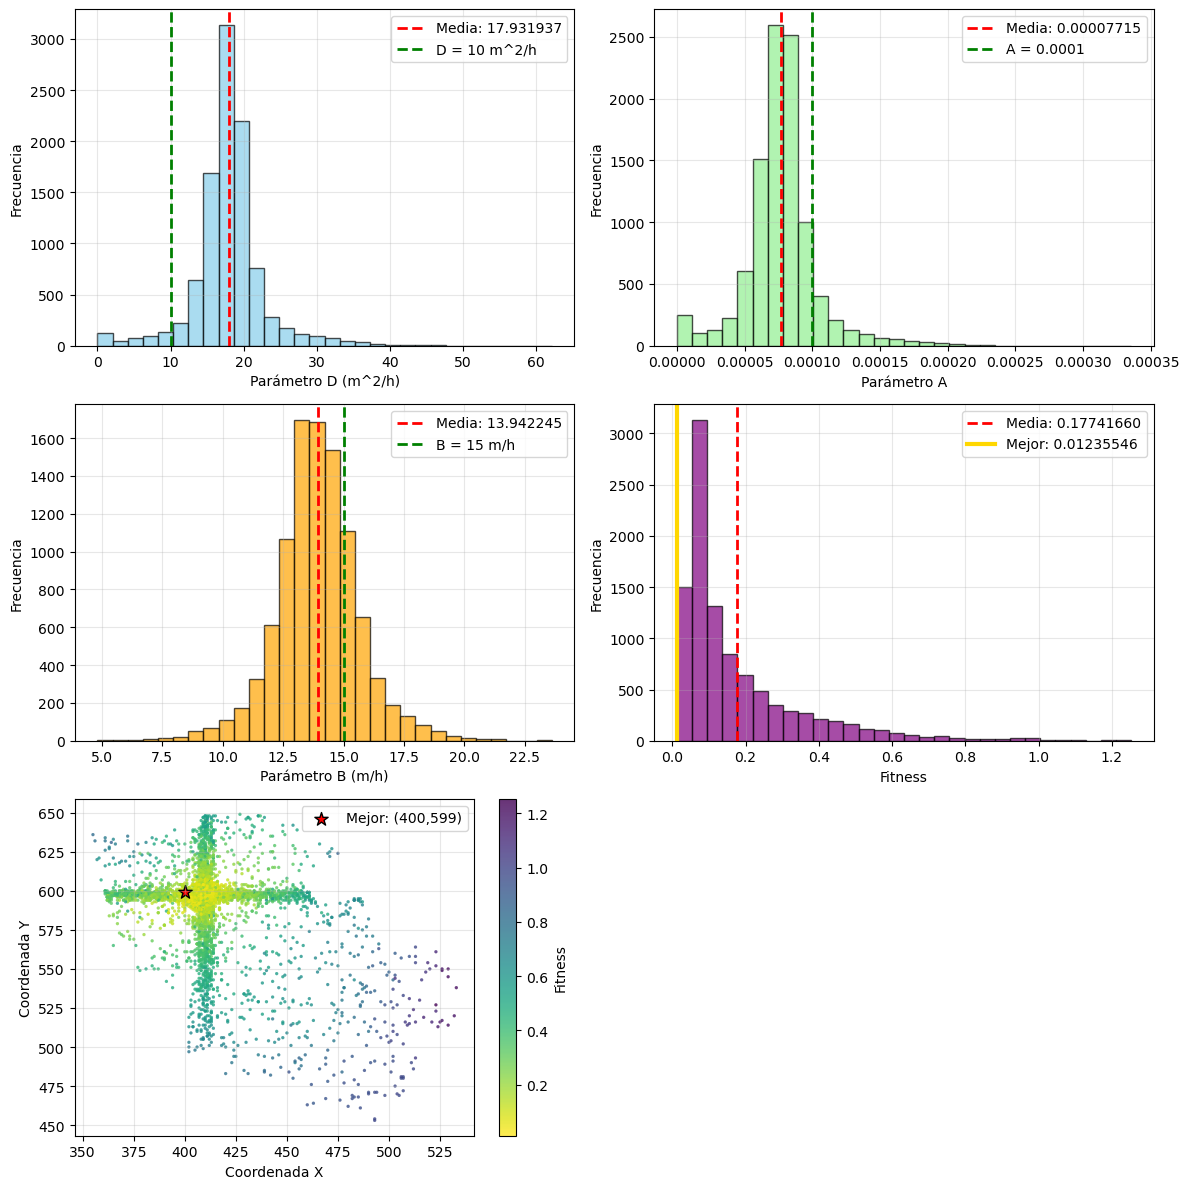

In [ ]:
# Visualizaciones específicas para la ÚLTIMA GENERACIÓN

# Crear figura con 3 filas y 2 columnas (6 ejes en total, usamos 5)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()  # pasar a lista simple para indexar fácilmente

n_bins = 30

# 1. Distribución del parámetro D
axes[0].hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["D"].mean():.6f}')
axes[0].axvline(10, color='green', linestyle='--', linewidth=2,
                  label=f'D = {10} m^2/h')
axes[0].set_xlabel('Parámetro D (m^2/h)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Distribución del parámetro A
axes[1].hist(gen_ultima['A'], bins=n_bins, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1].axvline(gen_ultima['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_ultima["A"].mean():.8f}')
axes[1].axvline(1e-4, color='green', linestyle='--', linewidth=2,
                         label=f'A = {1e-4}')
axes[1].set_xlabel('Parámetro A')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Distribución del parámetro B
axes[2].hist(gen_ultima['B'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
axes[2].axvline(gen_ultima['B'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["B"].mean():.6f}')
axes[2].axvline(15, color='green', linestyle='--', linewidth=2,
                 label=f'B = {15} m/h')
axes[2].set_xlabel('Parámetro B (m/h)')
axes[2].set_ylabel('Frecuencia')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4. Distribución del fitness
axes[3].hist(gen_ultima['fitness'], bins=n_bins, color='purple', alpha=0.7, edgecolor='black')
axes[3].axvline(gen_ultima['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["fitness"].mean():.8f}')
axes[3].axvline(gen_ultima['fitness'].min(), color='gold', linestyle='-', linewidth=3,
                 label=f'Mejor: {gen_ultima["fitness"].min():.8f}')
axes[3].set_xlabel('Fitness')
axes[3].set_ylabel('Frecuencia')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

# 5. Puntos de ignición coloreados por fitness
scatter = axes[4].scatter(gen_ultima['x'], gen_ultima['y'], 
                          c=gen_ultima['fitness'], s=5, cmap='viridis_r', 
                          alpha=0.8, linewidths=0.1)
mejor_gen_ultima = gen_ultima.loc[gen_ultima['fitness'].idxmin()]
axes[4].scatter(mejor_gen_ultima['x'], mejor_gen_ultima['y'], 
                 c='red', s=100, marker='*', edgecolors='black', linewidth=1,
                 label=f'Mejor: ({mejor_gen_ultima["x"]:.0f},{mejor_gen_ultima["y"]:.0f})')
axes[4].set_xlabel('Coordenada X')
axes[4].set_ylabel('Coordenada Y')
axes[4].legend()
axes[4].grid(True, alpha=0.3)
fig.colorbar(scatter, ax=axes[4], label='Fitness')

# Eliminar el subplot vacío (el sexto)
fig.delaxes(axes[5])

# Ajustar diseño
plt.tight_layout()
plt.savefig(f'resultados_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')
plt.show()

## Experimento 2

Ajustamos los parámetros $D$, $A$, $B$, $\beta$, $\gamma$ y las coordenadas del punto de ignición $(x,y)$. El terreno es homogéneo así que hay un solo tipo de combustible

### Mejores 10 individuos

In [21]:
# Ordenar por fitness (menor es mejor)
df_sorted = df_exp2.sort_values("fitness", ascending=True)

# Eliminar duplicados según las columnas que definen un individuo
# (acá pongo todas las que listaste, podés ajustar si alguna no hace falta)
df_unique = df_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "x", "y",
        "beta", "gamma"
    ],
    keep="first"
)

# Quedarse con los 10 mejores
top10 = df_unique.head(10)

# Mostrar
print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
for i, row in top10.iterrows():
    print(f"\n#{i+1}")
    print(f"   Generación: {row['generacion']}")
    print(f"   D = {row['D']}")
    print(f"   A = {row['A']}")
    print(f"   B = {row['B']}")
    print(f"   x = {row['x']}")
    print(f"   y = {row['y']}")
    print(f"   beta = {row['beta']}")
    print(f"   gamma = {row['gamma']}")
    print(f"   Fitness = {row['fitness']}")


🏆 TOP 10 INDIVIDUOS ENCONTRADOS:

#457350
   Generación: 45
   D = 22.733966827392575
   A = 0.000134453875944
   B = 15.831461906433104
   x = 399.0
   y = 604.0
   beta = 1.0283597707748413
   gamma = 0.2779764533042907
   Fitness = 0.0099804417855499

#232521
   Generación: 23
   D = 22.733966827392575
   A = 0.000134453875944
   B = 15.831461906433104
   x = 399.0
   y = 604.0
   beta = 1.0283598
   gamma = 0.27797645
   Fitness = 0.0099804417855499

#351879
   Generación: 35
   D = 23.150951385498047
   A = 0.0001441227650502
   B = 15.969078063964844
   x = 398.0
   y = 605.0
   beta = 1.021456241607666
   gamma = 0.2812633514404297
   Fitness = 0.0104118729866543

#567249
   Generación: 56
   D = 15.661454200744627
   A = 0.0001127720825024
   B = 15.808585166931152
   x = 399.0
   y = 602.0
   beta = 1.2063038349151611
   gamma = 0.3769092559814453
   Fitness = 0.0111884491486424

#566807
   Generación: 56
   D = 25.446044921875
   A = 0.0001266209728782
   B = 16.917425155639

### Análisis Bootstrap

In [49]:
ultima_generacion = df_exp2['generacion'].max()
df_ultima_exp2 = df_exp2[df_exp2['generacion'] == ultima_generacion].copy()

# Uso
res = bootstrap_confidence_intervals_df(df_ultima_exp2, param_cols=["D", "A", "B", "x", "y", "beta", "gamma"])

print("IC 95% de parámetros medios:\n", res["mean_params_CI"].round(7))
print("\nIC 95% de mejores parámetros:\n", res["best_params_CI"].round(7))

IC 95% de parámetros medios:
    param         low        high   boot_mean
0      D   26.617079   26.935143   26.774276
1      A    0.000152    0.000154    0.000153
2      B   17.360631   17.503658   17.430695
3      x  390.901660  391.818017  391.379403
4      y  598.173278  598.993665  598.598662
5   beta    1.134036    1.139536    1.136806
6  gamma    0.449211    0.453725    0.451454

IC 95% de mejores parámetros:
    param         low        high   boot_mean
0      D   15.661454   25.446045   21.165167
1      A    0.000113    0.000146    0.000129
2      B   15.808585   16.917425   16.006274
3      x  397.000000  400.000000  398.991000
4      y  602.000000  606.000000  603.335000
5   beta    0.794723    1.296239    1.061472
6  gamma    0.100000    0.491327    0.297019


### Análisis de la última Generación

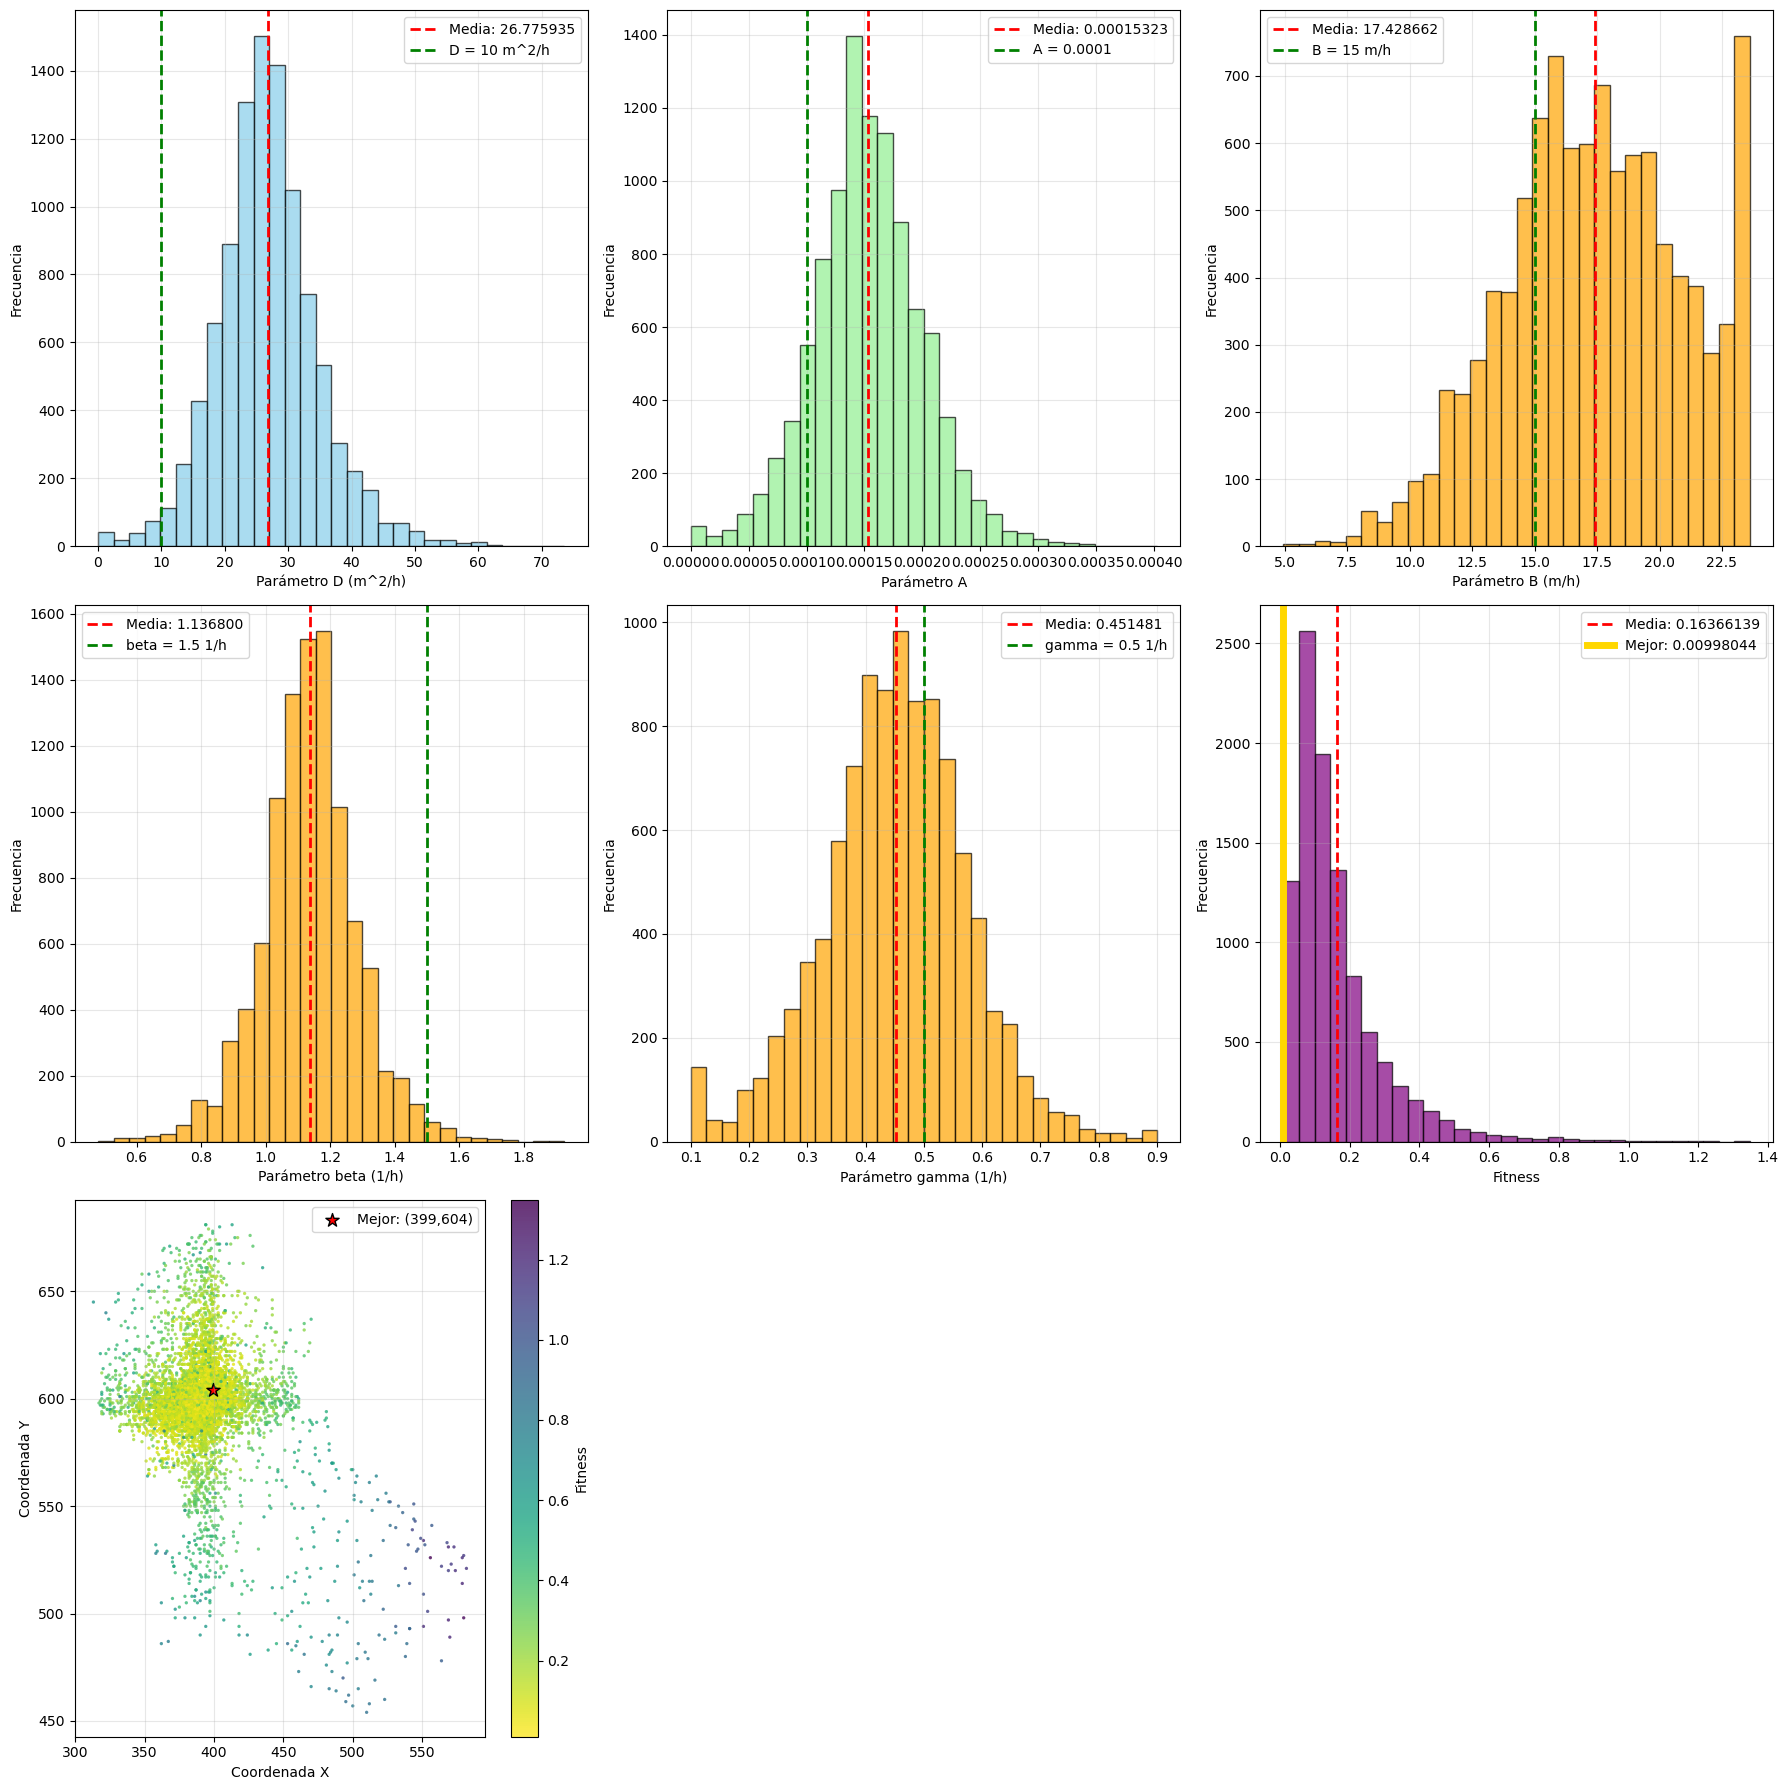

In [50]:
# Visualizaciones específicas para la ÚLTIMA GENERACIÓN

# Detectar automáticamente la última generación
ultima_generacion = df_exp2['generacion'].max()
gen_ultima = df_exp2[df_exp2['generacion'] == ultima_generacion].copy()

# Crear figura con 3 filas y 3 columnas (6 ejes en total, usamos 5)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()  # pasar a lista simple para indexar fácilmente

n_bins = 30

# 1. Distribución del parámetro D
axes[0].hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["D"].mean():.6f}')
axes[0].axvline(10, color='green', linestyle='--', linewidth=2,
                  label=f'D = {10} m^2/h')
axes[0].set_xlabel('Parámetro D (m^2/h)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Distribución del parámetro A
axes[1].hist(gen_ultima['A'], bins=n_bins, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1].axvline(gen_ultima['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_ultima["A"].mean():.8f}')
axes[1].axvline(1e-4, color='green', linestyle='--', linewidth=2,
                         label=f'A = {1e-4}')
axes[1].set_xlabel('Parámetro A')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Distribución del parámetro B
axes[2].hist(gen_ultima['B'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
axes[2].axvline(gen_ultima['B'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["B"].mean():.6f}')
axes[2].axvline(15, color='green', linestyle='--', linewidth=2,
                 label=f'B = {15} m/h')
axes[2].set_xlabel('Parámetro B (m/h)')
axes[2].set_ylabel('Frecuencia')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

axes[3].hist(gen_ultima['beta'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
axes[3].axvline(gen_ultima['beta'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["beta"].mean():.6f}')
axes[3].axvline(1.5, color='green', linestyle='--', linewidth=2,
                 label=f'beta = {1.5} 1/h')
axes[3].set_xlabel('Parámetro beta (1/h)')
axes[3].set_ylabel('Frecuencia')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

axes[4].hist(gen_ultima['gamma'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
axes[4].axvline(gen_ultima['gamma'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["gamma"].mean():.6f}')
axes[4].axvline(0.5, color='green', linestyle='--', linewidth=2,
                 label=f'gamma = {0.5} 1/h')
axes[4].set_xlabel('Parámetro gamma (1/h)')
axes[4].set_ylabel('Frecuencia')
axes[4].legend()
axes[4].grid(True, alpha=0.3)

# 4. Distribución del fitness
axes[5].hist(gen_ultima['fitness'], bins=n_bins, color='purple', alpha=0.7, edgecolor='black')
axes[5].axvline(gen_ultima['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["fitness"].mean():.8f}')
axes[5].axvline(gen_ultima['fitness'].min(), color='gold', linestyle='-', linewidth=5,
                 label=f'Mejor: {gen_ultima["fitness"].min():.8f}')
axes[5].set_xlabel('Fitness')
axes[5].set_ylabel('Frecuencia')
axes[5].legend()
axes[5].grid(True, alpha=0.3)

# 5. Puntos de ignición coloreados por fitness
scatter = axes[6].scatter(gen_ultima['x'], gen_ultima['y'], 
                          c=gen_ultima['fitness'], s=5, cmap='viridis_r', 
                          alpha=0.8, linewidths=0.1)
mejor_gen_ultima = gen_ultima.loc[gen_ultima['fitness'].idxmin()]
axes[6].scatter(mejor_gen_ultima['x'], mejor_gen_ultima['y'], 
                 c='red', s=100, marker='*', edgecolors='black', linewidth=1,
                 label=f'Mejor: ({mejor_gen_ultima["x"]:.0f},{mejor_gen_ultima["y"]:.0f})')
axes[6].set_xlabel('Coordenada X')
axes[6].set_ylabel('Coordenada Y')
axes[6].legend()
axes[6].grid(True, alpha=0.3)
fig.colorbar(scatter, ax=axes[6], label='Fitness')

# Eliminar el subplot vacío (el sexto)
fig.delaxes(axes[7])
fig.delaxes(axes[8])

# Ajustar diseño
plt.tight_layout()
plt.savefig(f'resultados_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')
plt.show()

In [65]:
plt.style.use(['science', 'ieee'])  # estilo global para todos los gráficos

n_bins = 30
ultima_generacion = df_exp2['generacion'].max()
gen_ultima = df_exp2[df_exp2['generacion'] == ultima_generacion].copy()

# 1. Distribución del parámetro D
with plt.style.context(['science', 'ieee']):
    fig, ax = plt.subplots(figsize=(3.5, 3.0))  # tamaño típico de paper (en pulgadas)
    ax.hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
    ax.axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=1.2,
                  label=f'Mean: {gen_ultima["D"].mean():.6f}')
    ax.axvline(10, color='green', linestyle='--', linewidth=1.2,
                  label=f'D = {10} m$^2$/h')
    ax.set_xlabel(r'Parameter $D$ (m$^2$/h)')
    ax.set_ylabel('Frequence')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'distribucion_D_generacion_{ultima_generacion}.pdf', dpi=600, bbox_inches='tight')
    plt.close()

## Experimento 3

En este experimento generamos un multiincendio en 3 focos distintos y ajustamos los parámetros $D$, $A$, $B$, $\beta_i$, $\gamma_i$ para $i \in \{1, 2, 3, 4, 5\}$

### Mejores 10 individuos

In [12]:
# Ordenar por fitness (menor es mejor)
df_sorted = df_exp3.sort_values("fitness", ascending=True)

# Eliminar duplicados según las columnas que definen un individuo
# (acá pongo todas las que listaste, podés ajustar si alguna no hace falta)
df_unique = df_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "beta_1", "beta_2", "beta_3", "beta_4", "beta_5",
        "gamma_1", "gamma_2", "gamma_3", "gamma_4", "gamma_5",
    ],
    keep="first"
)

# Quedarse con los 10 mejores
top10 = df_unique.head(10)

# Mostrar
print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
for i, row in top10.iterrows():
    print(f"\n#{i+1}")
    print(f"   Generación: {row['generacion']}")
    print(f"   D = {row['D']}")
    print(f"   A = {row['A']}")
    print(f"   B = {row['B']}")
    print(f"   beta_1 = {row['beta_1']}")
    print(f"   beta_2 = {row['beta_2']}")
    print(f"   beta_3 = {row['beta_3']}")
    print(f"   beta_4 = {row['beta_4']}")
    print(f"   beta_5 = {row['beta_5']}")
    print(f"   gamma_1 = {row['gamma_1']}")
    print(f"   gamma_2 = {row['gamma_2']}")
    print(f"   gamma_3 = {row['gamma_3']}")
    print(f"   gamma_4 = {row['gamma_4']}")
    print(f"   gamma_5 = {row['gamma_5']}")
    print(f"   Fitness = {row['fitness']}")

# mejor_individuo = top10
# print(mejor_individuo)


🏆 TOP 10 INDIVIDUOS ENCONTRADOS:

#592742
   Generación: 59.0
   D = 8.249410629272461
   A = 9.429427154827864e-05
   B = 14.843748092651367
   beta_1 = 0.75022143
   beta_2 = 0.46501368
   beta_3 = 0.8524972
   beta_4 = 1.8100997
   beta_5 = 0.602289
   gamma_1 = 0.28173158
   gamma_2 = 0.1
   gamma_3 = 0.28513098
   gamma_4 = 0.17225336
   gamma_5 = 0.089999996
   Fitness = 0.0244468659686359

#586669
   Generación: 58.0
   D = 16.775510787963867
   A = 0.0001204430591315
   B = 17.26732635498047
   beta_1 = 0.72445863
   beta_2 = 0.5587784
   beta_3 = 0.9227671
   beta_4 = 2.0
   beta_5 = 0.72555125
   gamma_1 = 0.35489884
   gamma_2 = 0.23686449
   gamma_3 = 0.35118422
   gamma_4 = 0.5305523
   gamma_5 = 0.1
   Fitness = 0.0270763253896811

#440394
   Generación: 44.0
   D = 16.7735595703125
   A = 0.0001077379201888
   B = 16.372913360595703
   beta_1 = 0.5802484
   beta_2 = 0.5303866
   beta_3 = 0.91939026
   beta_4 = 2.0
   beta_5 = 0.99104357
   gamma_1 = 0.24285705
   gamma_

### Análisis bootstrap

In [54]:
ultima_generacion = df_exp3['generacion'].max()
df_ultima_exp3 = df_exp3[df_exp3['generacion'] == ultima_generacion].copy()
pd.set_option("display.precision", 10)

# Uso
res = bootstrap_confidence_intervals_df(df_ultima_exp3, param_cols=["D", "A", "B", "beta_1", "beta_2", "beta_3", "beta_4", "beta_5", 
                                                                    "gamma_1", "gamma_2", "gamma_3", "gamma_4", "gamma_5"])

print("IC 95% de parámetros medios:\n", res["mean_params_CI"].round(7))
print("\nIC 95% de mejores parámetros:\n", res["best_params_CI"].round(7))

IC 95% de parámetros medios:
       param         low        high   boot_mean
0         D  10.1561766  10.2893981  10.2205621
1         A   0.0000982   0.0000990   0.0000986
2         B  15.0819529  15.1827685  15.1320708
3    beta_1   0.7244783   0.7285244   0.7265346
4    beta_2   0.5235310   0.5270579   0.5252864
5    beta_3   0.8528279   0.8620086   0.8575012
6    beta_4   1.9145501   1.9188865   1.9167211
7    beta_5   0.8536557   0.8609357   0.8573266
8   gamma_1   0.3077573   0.3106730   0.3092251
9   gamma_2   0.1945817   0.1968563   0.1957020
10  gamma_3   0.2518970   0.2564571   0.2541289
11  gamma_4   0.4507414   0.4547451   0.4527522
12  gamma_5   0.2687616   0.2729884   0.2708397

IC 95% de mejores parámetros:
       param         low        high   boot_mean
0         D   8.1159286  11.9560394   9.3214806
1         A   0.0000977   0.0000993   0.0000988
2         B  14.3015833  15.8322039  15.6314683
3    beta_1   0.6964126   0.7419021   0.7192203
4    beta_2   0.4694708   

## Análisis de la última generación
### Análisis específico de los mejores resultados obtenidos

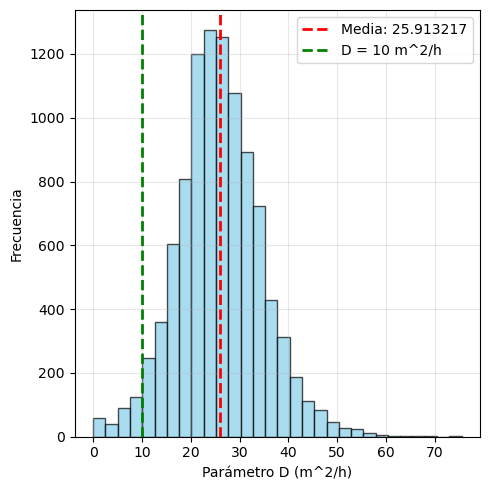

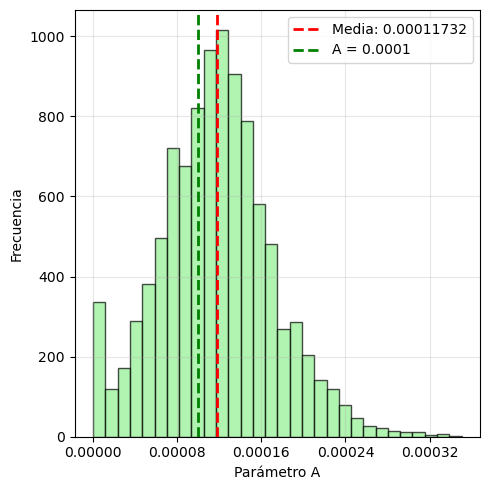

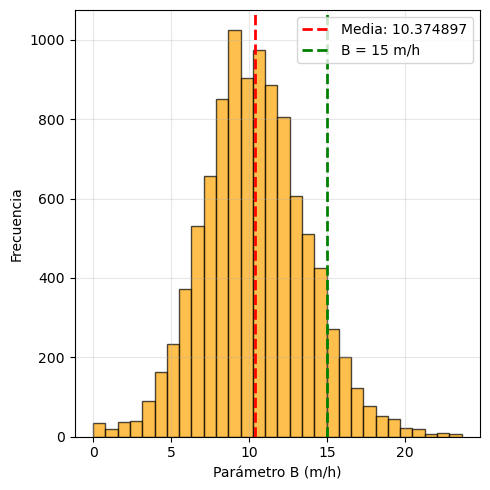

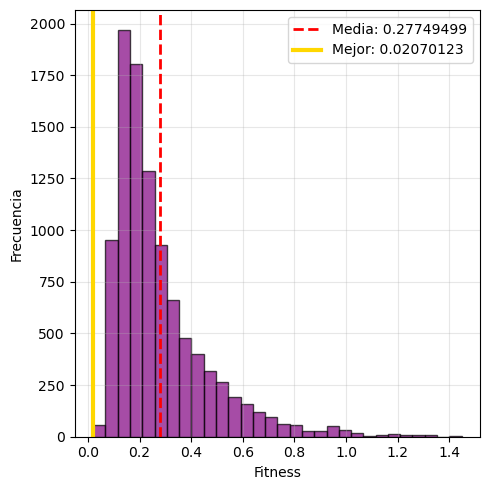

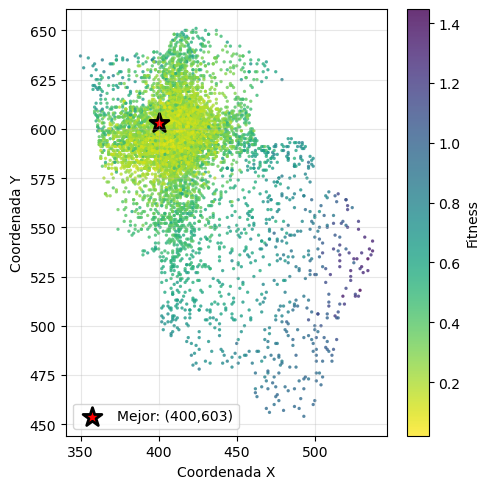

In [7]:
# Visualizaciones específicas para la ÚLTIMA GENERACIÓN

# Detectar automáticamente la última generación
ultima_generacion = df_total['generacion'].max()
gen_ultima = df_total[df_total['generacion'] == ultima_generacion].copy()

n_bins = 30

# Seleccionar los mejores 1000 individuos de la última generación (fitness más pequeño)
# gen_ultima = gen_ultima.nsmallest(100, 'fitness')

# 1. Distribución del parámetro D en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["D"].mean():.6f}')
plt.axvline(10, color='green', linestyle='--', linewidth=2,
                  label=f'D = {10} m^2/h')
ax.set_xlabel('Parámetro D (m^2/h)')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_D_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 2. Distribución del parámetro A en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['A'], bins=n_bins, color='lightgreen', alpha=0.7, edgecolor='black')
ticks = np.linspace(gen_ultima['A'].min(), gen_ultima['A'].max(), 6)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
plt.axvline(gen_ultima['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_ultima["A"].mean():.8f}')
plt.axvline(1e-4, color='green', linestyle='--', linewidth=2,
                         label=f'A = {1e-4}')
ax.set_xlabel('Parámetro A')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_A_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 3. Distribución del parámetro B en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['B'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['B'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["B"].mean():.6f}')
plt.axvline(15, color='green', linestyle='--', linewidth=2,
                 label=f'B = {15} m/h')
ax.set_xlabel('Parámetro B (m/h)')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_B_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_1'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_1'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_1"].mean():.6f}')
# plt.axvline(0.91, color='green', linestyle='--', linewidth=2,
#                  label=f'β1 = {0.91}')
# ax.set_xlabel('Parámetro β1')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_1_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_2'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_2'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_2"].mean():.6f}')
# plt.axvline(0.72, color='green', linestyle='--', linewidth=2,
#                  label=f'β2 = {0.72}')
# ax.set_xlabel('Parámetro β2')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_2_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_3'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_3'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_3"].mean():.6f}')
# plt.axvline(1.38, color='green', linestyle='--', linewidth=2,
#                  label=f'β3 = {1.38}')
# ax.set_xlabel('Parámetro β3')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_3_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_4'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_4'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_4"].mean():.6f}')
# plt.axvline(1.94, color='green', linestyle='--', linewidth=2,
#                  label=f'β4 = {1.94}')
# ax.set_xlabel('Parámetro β4')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_4_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['beta_5'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['beta_5'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["beta_5"].mean():.6f}')
# plt.axvline(0.75, color='green', linestyle='--', linewidth=2,
#                  label=f'β5 = {0.75}')
# ax.set_xlabel('Parámetro β5')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_beta_5_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_1'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_1'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_1"].mean():.6f}')
# plt.axvline(0.5, color='green', linestyle='--', linewidth=2,
#                  label=f'γ1 = {0.5}')
# ax.set_xlabel('Parámetro γ1')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_1_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_2'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_2'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_2"].mean():.6f}')
# plt.axvline(0.38, color='green', linestyle='--', linewidth=2,
#                  label=f'γ2 = {0.38}')
# ax.set_xlabel('Parámetro γ2')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_2_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_3'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_3'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_3"].mean():.6f}')
# plt.axvline(0.84, color='green', linestyle='--', linewidth=2,
#                  label=f'γ3 = {0.84}')
# ax.set_xlabel('Parámetro γ3')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_3_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_4'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_4'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_4"].mean():.6f}')
# plt.axvline(0.45, color='green', linestyle='--', linewidth=2,
#                  label=f'γ4 = {0.45}')
# ax.set_xlabel('Parámetro γ4')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_4_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# fig, ax = plt.subplots(figsize=(5,5))
# plt.hist(gen_ultima['gamma_5'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
# plt.axvline(gen_ultima['gamma_5'].mean(), color='red', linestyle='--', linewidth=2,
#                 label=f'Media: {gen_ultima["gamma_5"].mean():.6f}')
# plt.axvline(0.14, color='green', linestyle='--', linewidth=2,
#                  label=f'γ5 = {0.14}')
# ax.set_xlabel('Parámetro γ5')
# ax.set_ylabel('Frecuencia')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig(f'distribucion_gamma_5_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 4. Distribución del fitness en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['fitness'], bins=n_bins, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["fitness"].mean():.8f}')
plt.axvline(gen_ultima['fitness'].min(), color='gold', linestyle='-', linewidth=3,
                 label=f'Mejor: {gen_ultima["fitness"].min():.8f}')
ax.set_xlabel('Fitness')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_fitness_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 5. Puntos de ignición coloreados por fitness (última generación)
fig, ax = plt.subplots(figsize=(5,5))
scatter = ax.scatter(gen_ultima['x'], gen_ultima['y'], 
                          c=gen_ultima['fitness'], s=5, cmap='viridis_r', 
                          alpha=0.8, linewidths=0.1)
# Destacar el mejor individuo
mejor_gen_ultima = gen_ultima.loc[gen_ultima['fitness'].idxmin()]
plt.scatter(mejor_gen_ultima['x'], mejor_gen_ultima['y'], 
                 c='red', s=200, marker='*', edgecolors='black', linewidth=2,
                 label=f'Mejor: ({mejor_gen_ultima["x"]:.0f},{mejor_gen_ultima["y"]:.0f})')
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Fitness')
plt.tight_layout()
plt.savefig(f'distribucion_puntos_ignicion_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')